<a href="https://colab.research.google.com/github/aka-hombre/MAT422/blob/main/MAT422_HW1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import re
import random

#1.2.1 - Linear Spaces

Recall lemma 1.2.3 (Every Span is a linear subspace). We will show the span of two linearly independent vectors is $\mathbf{R}^2$.

We will plot 2 vectors to bigin with.

input a 2d vector in the form of a tuple, ie (1,2): 1,2
input a 2d vector in the form of a tuple, ie (1,2): 3,4


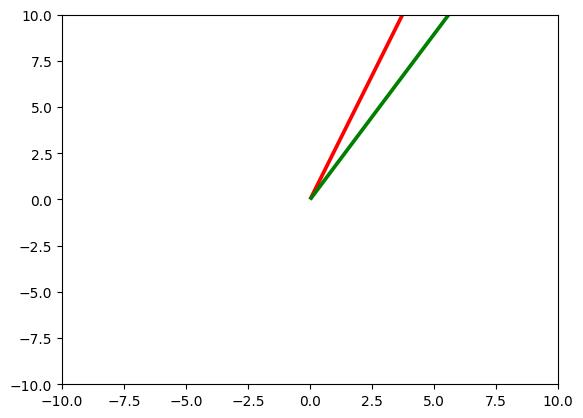


Now we will make a 1000 linear combinations of the above vectors.



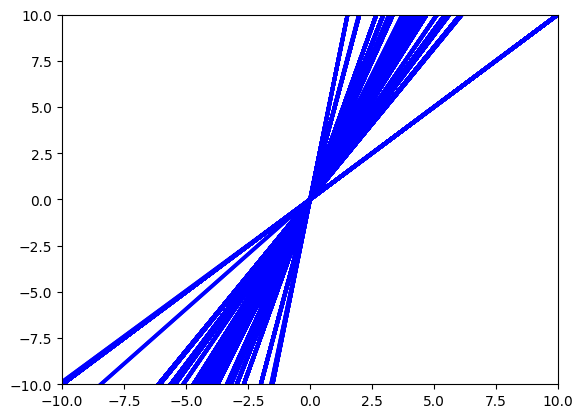

In [3]:
uv1 = input("input a 2d vector in the form of a tuple, ie (1,2): ")
uv2 = input("input a 2d vector in the form of a tuple, ie (1,2): ")

# getting numbers from string
v1 = list(map(int, re.findall(r'\d+', uv1)))
v2 = list(map(int, re.findall(r'\d+', uv2)))

# making an initial matrix
A = np.array([v1, v2])

# Origin
o = np.array([[0, 0], [0, 0]])

# Using the quiver() function to plot vectors
plt.quiver(*o, A[:, 0], A[:, 1], color=['red','green'], scale=1)
plt.ylim(-10,10)
plt.xlim(-10,10)
plt.show()
print("\nNow we will make a 1000 linear combinations of the above vectors.\n")
A = np.vstack([A,np.zeros(shape=(1000, 2))])

# Generate and plot linear combinations
for i in range(len(A)):
    if i==len(A)-2: break # Adjusting the loop to stay within bounds
    if i % 2 == 0:
        x0 = random.randint(-100, 100) * A[1] + random.randint(-100, 100) * A[i + 1]
    else:
        x0 = random.randint(-10, 10) * A[0] - random.randint(-10, 10) * A[i + 1]

    A[i + 2] = x0  # Store the new vector
    plt.quiver(*o, x0[0], x0[1], color='blue', scale=10)


plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.show()

Notice if your vectors were linearly independent, they begin to fill our space. If they were not, then they stay on a line. It is obious that these linear combinations are a subspace of $\mathbf{R}^2$. Let's prove that the span of two linearly independent vectors is all of $\mathbf{R}^2$.

*Proof.* Let $\mathbf{v}_1, \mathbf{v}_2 \in \mathbf{R}^2$ such that $\mathbf{v}_1$ and $\mathbf{v}_2$ are linearly independent.

Then,

span($\mathbf{v}_1, \mathbf{v}_2$) = $\{ \mathbf{\alpha}_1\mathbf{v}_1 +\mathbf{\alpha}_2\mathbf{v}_2: \mathbf{\alpha}_1,\mathbf{\alpha}_2 \in \mathbf{R}\}$

By Lemma 1.2.3 (Every Span is a linear subspace), we have span($\mathbf{v}_1, \mathbf{v}_2$) $\subseteq \mathbf{R}^2$. Now, let $\mathbf{u}_1 \in \mathbf{R}^2$ and we will construct a 3x3 matrix
\begin{equation}
\mathbf{A} = \begin{bmatrix}\mathbf{v}_1 & \mathbf{v}_2 & \mathbf{u}_1\\ 0 & 0 &0\end{bmatrix}
\\=\begin{bmatrix} v_{11} & v_{12} & u_{13} \\
v_{21} & v_{22} & u_{23} \\
0 & 0 & 0\end{bmatrix}
\end{equation}

Taking the determinant, $\mathbf{det}(\mathbf{A})= 0$. This means our vectors are linearly dependent, but we know $\mathbf{v}_1$ and $\mathbf{v}_2$ are linearily independent. Thus, $\mathbf{u}_1 \in$ span($\mathbf{v}_1, \mathbf{v}_2$). Therfore, $\mathbf{R}^2\subseteq$ span($\mathbf{v}_1, \mathbf{v}_2$) and span($\mathbf{v}_1, \mathbf{v}_2$) = $\mathbf{R}^2. \hspace{5mm} \square$

#1.2.2 - Orthogonality

Remember the inner product of two vectors is described as $\langle \mathbf{v}, \mathbf{u}\rangle = \mathbf{u}\cdot\mathbf{v} =\sum_i^n u_iv_i$ and the sqare of the norm of a vector ($\mathbf{v}$) is equal to the inner product of $\mathbf{v}$ with itself, ie. $||\mathbf{v}||^2 = \langle \mathbf{v}, \mathbf{v} \rangle$ which implies $||\mathbf{v}|| = \sqrt{\langle \mathbf{v},\mathbf{v} \rangle}$.

We will do an exmaple of the best approximation theorem, which states:

Let $U\subseteq V$ be a linear subspace with orthanormal basis $\mathbf{q}_1,\dots,\mathbf{q}_m$ and let $\mathbf{v}\in V$. For any $\mathbf{u}\in U$
\begin{equation}
||\mathbf{v} - \textbf{proj}_\mathbf{u}\mathbf{v} || \leq ||\mathbf{v}-\mathbf{u}||
\end{equation}

In this example we will try to find the best approximation of $\mathbf{v}$ (blue color) in the subspace of our two vectors.

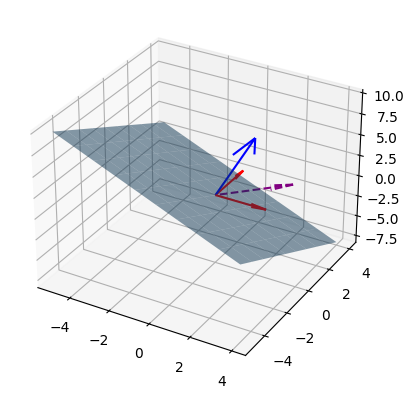

In [4]:
ax = plt.figure().add_subplot(projection='3d')
u1 = 5*np.array([0,1,0])
u2 = 5*np.array([1,0,0])
u12 = u1+u2
u3 = -1*np.cross(u1,u2) #taking the cross product to generate a vector outside of our subspace, and plot a plane
v = u3+u12 #our exapmle vector
u3h = u3/(np.linalg.norm(u3))


#Our vector v projected to the plane
proj_v = v-u3

#Generate plane from vectors
xx, yy = np.meshgrid(range(-5, 5), range(-5, 5))
zz = (np.dot(u3h, u1) - xx - yy)/u3h[2]

# plot a plane given the two vectors
ax.plot_surface(xx, yy, zz, alpha=0.5)

ax.quiver(0,0,0, u1[0], u1[1], u1[2] ,color='red', length=0.5)
ax.quiver(0,0,0, u2[0], u2[1], u2[2], color='red', length=0.5)
ax.quiver(0,0,0, v[0], v[1], v[2], color='blue', length=0.25)
ax.quiver(0,0,0, proj_v[0], proj_v[1], proj_v[2], color='purple', linestyle='dashed', length=0.5)
plt.show()

Here the dashed puprple line is our projection onto the subspace, of $\mathbf{u1}$ and $\mathbf{u2}$. Since in this case $\forall \mathbf{u}$,
\begin{equation}
||\mathbf{v} - \textbf{proj}_\mathbf{u}\mathbf{v} || = ||\mathbf{v}-\mathbf{u}||
\end{equation}
our projection is the best approximation.

#1.2.3 Gram-Schmidt Process

The Gram-Schmidt algorithm is used to obtain an orthonormal basis. We will construct a function to find n orthanormal vectors given an NxN matrix.

In [33]:
def gram_schmidt_columns(matrix):
    def normalize(v):
        norm = np.linalg.norm(v)
        if norm == 0:  # Handle zero vector case
            return v
        return v / norm

    def project(u, v):
        return np.dot(v, u) / np.dot(u, u) * u

    matrix = np.array(matrix, dtype=float).T  # Transpose to work with columns
    orthogonal_vectors = []

    for v in matrix:
        for u in orthogonal_vectors:
            v = v - project(u, v)
        orthogonal_vectors.append(v)

    orthonormal_vectors = [normalize(v) for v in orthogonal_vectors if np.linalg.norm(v) > 1e-10]

    return np.array(orthonormal_vectors).T  # Transpose back to original form

# Example
matrix = [[1, 2, 5], [1, 3, 6],[0, 4, 7]]

ei = gram_schmidt_columns(matrix)
print("Orthonormal Basis:\n", ei)


Orthonormal Basis:
 [[ 0.70710678 -0.12309149  0.69631062]
 [ 0.70710678  0.12309149 -0.69631062]
 [ 0.          0.98473193  0.17407766]]


#1.2.4 - Eigenvalues and Eigenvectors

We will perform a spectral decomposition of a matrix, using python.


In [60]:
A = np.random.randint(200, size=[3, 3]) #3x3 matrix
As = (A + A.T) #Creating a symmetric matrix
print("Our example Symmetric matrix:")
print(As)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(As)
print("\nEigenvalues of above matrix:\n", eigenvalues)
print("Eigenvectors of above matrix:\n", eigenvectors)

print("\nNow notice, applying Gram Schmidt to our eigenvectors is the same as above: ")
U = gram_schmidt(eigenvectors)

print(U)

eigvM = np.dot(np.dot(U.transpose(),As), U) #Matrix multiplication of U^T A U, to get diagnal matrix
print("\nThis is our diagnal matrix, notice our it has round off errors")
print(eigvM)
threshold = 1e-10  # Set this threshold

# Zero out small values in eigvM
eigvM[np.abs(eigvM) < threshold] = 0

print("\nFinal Diagonalized Matrix:")
print(eigvM)
print('\nNow we will recostruct our Matrix.\nWe will multiply PD')

print(np.dot(eigenvectors, eigvM))

print('\nNow multiplying above by P^T. Here is our original matirx:')
print(np.dot(np.dot(eigenvectors, eigvM), eigenvectors.transpose()))

Our example Symmetric matrix:
[[242 164 308]
 [164 314 283]
 [308 283 364]]

Eigenvalues of above matrix:
 [823.02175948 -26.6334258  123.61166632]
Eigenvectors of above matrix:
 [[-0.5083421  -0.64418272  0.5715041 ]
 [-0.53773937 -0.28090672 -0.79493886]
 [-0.67262521  0.71142114  0.2036057 ]]

Now notice, applying Gram Schmidt to our eigenvectors is the same as above: 
[[-0.5083421  -0.64418272  0.5715041 ]
 [-0.53773937 -0.28090672 -0.79493886]
 [-0.67262521  0.71142114  0.2036057 ]]

This is our diagnal matrix, notice our it has round off errors
[[ 8.23021759e+02 -1.51495140e-13  2.88615368e-13]
 [-1.45783267e-13 -2.66334258e+01 -9.60555747e-15]
 [ 3.00552771e-13 -1.97731668e-14  1.23611666e+02]]

Final Diagonalized Matrix:
[[823.02175948   0.           0.        ]
 [  0.         -26.6334258    0.        ]
 [  0.           0.         123.61166632]]

Now we will recostruct our Matrix.
We will multiply PD
[[-418.37661102   17.1567926    70.64457389]
 [-442.5712022     7.48150824  -9